In [1]:
#%pip install pandas 

In [2]:
#%pip install numpy

In [3]:
#%pip install matplotlib

In [4]:
#%pip install seaborn

In [5]:
#%pip install scikit-learn

In [6]:
#%pip install tensorflow

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
#%pip install openpyxl

In [9]:
df=pd.read_excel("2022_drugs_perez_dataset.xlsx")
df.head(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
0,Caffeine,194.19,14.00,-0.07,-0.97,58.44,18.96,-5.769,-1.977,5.769,1.977,3.8730,1.8960,0.968250,0.824631,92.0
1,Acenocoumarol,353.3,4.70,1.98,-4.5,109.42,34.35,-6.399,-3.522,6.399,3.522,4.9605,1.4385,1.240125,0.708898,NaN
2,Acetaminophen,151.16,9.90,0.91,-1.6,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.8
3,Acetazolamide,222.3,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.0
4,Acetic acid,60.05,4.80,-0.17,1.22,37.3,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.0
5,Acepromazine,326.5,9.30,4.3,-4.5,25.2,37.17,-4.924,-2.529,4.924,2.529,3.7265,1.1975,0.931625,1.366806,NaN
6,Acetylmethadol,353.5,9.87,4.27,-5.3,29.54,40.82,-5.163,-1.485,5.163,1.485,3.3240,1.8390,0.831000,0.999456,NaN
7,Alphameprodine,275.4,9.10,3.46,-3.1,29.54,31.7,-5.284,-1.511,5.284,1.511,3.3975,1.8865,0.849375,0.954810,NaN
8,Alphaprodine,261.36,8.70,3.24,-2.7,29.54,29.83,-5.302,-1.501,5.302,1.501,3.4015,1.9005,0.850375,0.946725,NaN
9,Alprenolol,249.35,9.60,3.1,-3.1,41.49,29.38,-5.694,-1.455,5.694,1.455,3.5745,2.1195,0.893625,0.808092,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               260 non-null    object 
 1   Molecular Weight (g/mol)  259 non-null    object 
 2   pKa                       260 non-null    float64
 3   Log P                     260 non-null    object 
 4   Log S                     256 non-null    object 
 5   Polar Surface Area (Å2)   260 non-null    object 
 6   Polarizability (Å3)       259 non-null    object 
 7   HOMO (eV)                 260 non-null    float64
 8   LUMO (eV)                 260 non-null    float64
 9   Ionization Energy (eV)    258 non-null    float64
 10  Electron Affinity (eV)    258 non-null    float64
 11  Electronegativity (eV)    258 non-null    float64
 12  Hardness  (eV)            258 non-null    float64
 13  Electrophilicity (eV)     260 non-null    float64
 14   ΔN_Fe    

In [11]:
df = df.sort_values(by='Common_name', key=lambda col: col.str.lower())
df.head(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
15,4-Aminohippuric acid,194.19,3.64,-0.89,-1.8,92.42,19.13,-6.037,-2.391,6.037,2.391,4.2140,1.8230,1.053500,0.764125,NaN
1,Acenocoumarol,353.3,4.70,1.98,-4.5,109.42,34.35,-6.399,-3.522,6.399,3.522,4.9605,1.4385,1.240125,0.708898,NaN
5,Acepromazine,326.5,9.30,4.3,-4.5,25.2,37.17,-4.924,-2.529,4.924,2.529,3.7265,1.1975,0.931625,1.366806,NaN
2,Acetaminophen,151.16,9.90,0.91,-1.6,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.8
3,Acetazolamide,222.3,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.0
4,Acetic acid,60.05,4.80,-0.17,1.22,37.3,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.0
6,Acetylmethadol,353.5,9.87,4.27,-5.3,29.54,40.82,-5.163,-1.485,5.163,1.485,3.3240,1.8390,0.831000,0.999456,NaN
7,Alphameprodine,275.4,9.10,3.46,-3.1,29.54,31.7,-5.284,-1.511,5.284,1.511,3.3975,1.8865,0.849375,0.954810,NaN
8,Alphaprodine,261.36,8.70,3.24,-2.7,29.54,29.83,-5.302,-1.501,5.302,1.501,3.4015,1.9005,0.850375,0.946725,NaN
9,Alprenolol,249.35,9.60,3.1,-3.1,41.49,29.38,-5.694,-1.455,5.694,1.455,3.5745,2.1195,0.893625,0.808092,NaN


In [12]:
df.head()

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
15,4-Aminohippuric acid,194.19,3.64,-0.89,-1.8,92.42,19.13,-6.037,-2.391,6.037,2.391,4.2140,1.8230,1.053500,0.764125,NaN
1,Acenocoumarol,353.3,4.70,1.98,-4.5,109.42,34.35,-6.399,-3.522,6.399,3.522,4.9605,1.4385,1.240125,0.708898,NaN
5,Acepromazine,326.5,9.30,4.3,-4.5,25.2,37.17,-4.924,-2.529,4.924,2.529,3.7265,1.1975,0.931625,1.366806,NaN
2,Acetaminophen,151.16,9.90,0.91,-1.6,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.8
3,Acetazolamide,222.3,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.0


In [13]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 78 entries, 2 to 254
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               78 non-null     object 
 1   Molecular Weight (g/mol)  78 non-null     object 
 2   pKa                       78 non-null     float64
 3   Log P                     78 non-null     object 
 4   Log S                     78 non-null     object 
 5   Polar Surface Area (Å2)   78 non-null     object 
 6   Polarizability (Å3)       78 non-null     object 
 7   HOMO (eV)                 78 non-null     float64
 8   LUMO (eV)                 78 non-null     float64
 9   Ionization Energy (eV)    78 non-null     float64
 10  Electron Affinity (eV)    78 non-null     float64
 11  Electronegativity (eV)    78 non-null     float64
 12  Hardness  (eV)            78 non-null     float64
 13  Electrophilicity (eV)     78 non-null     float64
 14   ΔN_Fe          

In [14]:
df = df.drop_duplicates(subset='Common_name')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 70 entries, 2 to 254
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               70 non-null     object 
 1   Molecular Weight (g/mol)  70 non-null     object 
 2   pKa                       70 non-null     float64
 3   Log P                     70 non-null     object 
 4   Log S                     70 non-null     object 
 5   Polar Surface Area (Å2)   70 non-null     object 
 6   Polarizability (Å3)       70 non-null     object 
 7   HOMO (eV)                 70 non-null     float64
 8   LUMO (eV)                 70 non-null     float64
 9   Ionization Energy (eV)    70 non-null     float64
 10  Electron Affinity (eV)    70 non-null     float64
 11  Electronegativity (eV)    70 non-null     float64
 12  Hardness  (eV)            70 non-null     float64
 13  Electrophilicity (eV)     70 non-null     float64
 14   ΔN_Fe          

In [15]:
df.head(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
2,Acetaminophen,151.16,9.90,0.91,-1.6,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.80
3,Acetazolamide,222.3,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.00
4,Acetic acid,60.05,4.80,-0.17,1.22,37.3,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.00
11,Aminobenzoic acid,"137,14",3.38,0.83,-0.4,63.32,13.44,-5.922,-2.122,5.922,2.122,4.0220,1.9000,1.005500,0.783684,80.00
14,Aminophylline,420.43,5.00,-3.03,-0.9,69.3,16.86,-5.869,-2.115,5.869,2.115,3.9920,1.8770,0.998000,0.801279,87.00
18,Amitriptyline,277.4,9.40,4.92,-4.39,3.24,33.74,-5.211,-1.887,5.211,1.887,3.5490,1.6620,0.887250,1.038207,94.00
20,Amoxicillin,365.4,2.40,0.87,-2.6,132.96,35.52,-5.999,-1.885,5.999,1.885,3.9420,2.0570,0.985500,0.743316,94.47
21,Ampicillin,349.4,2.70,1.35,-2.8,112.73,34.54,-6.158,-1.973,6.158,1.973,4.0655,2.0925,1.016375,0.701195,92.80
27,Antipyrine,188.33,2.20,0.38,-0.6,23.55,20.4,-5.313,-1.894,5.313,1.894,3.6035,1.7095,0.900875,0.993419,95.70
30,Arecoline,155.19,7.60,0.35,0.81,29.54,17.1,-5.358,-2.302,5.358,2.302,3.8300,1.5280,0.957500,1.037304,96.97


In [16]:
df.tail(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
230,Sulfaguanidine,214.25,2.80,-0.52,-2.4,122.06,20.38,-5.926,-2.103,5.926,2.103,4.0145,1.9115,1.003625,0.780931,67.700
231,Sulfamerazina,264.31,7.10,0.14,-2.9,97.97,26.51,-6.425,-2.424,6.425,2.424,4.4245,2.0005,1.106125,0.643714,84.500
234,Sulfamethoxazole,253.28,5.60,0.89,2.62,98.22,24.99,-6.175,-2.495,6.175,2.495,4.3350,1.8400,1.083750,0.724185,91.600
235,Sulfanilamide,172.21,10.40,-0.62,-1.36,86.18,16.25,-6.478,-2.445,6.478,2.445,4.4615,2.0165,1.115375,0.629432,93.700
236,Sulfapyridine,249.29,8.40,0.35,-2.7,85.08,24.97,-6.419,-2.478,6.419,2.478,4.4485,1.9705,1.112125,0.647425,76.900
239,Theobromine,180.16,9.90,-0.78,-1.4,67.23,16.85,-5.863,-2.073,5.863,2.073,3.9680,1.8950,0.992000,0.800000,93.000
240,Theophylline,180.16,8.81,-0.02,-0.9,69.3,16.86,-5.884,-2.084,5.884,2.084,3.9840,1.9000,0.996000,0.793684,90.600
245,Trimethoprim,290.32,7.20,0.91,-2.86,105.51,29.71,-5.374,-1.307,5.374,1.307,3.3405,2.0335,0.835125,0.899803,92.000
250,Urea,60.056,0.20,-2.11,0.96,69.11,5.1,-6.050,0.332,6.050,-0.332,2.8590,3.1910,0.714750,0.648856,94.060
254,Warfarin,308.3,5.10,2.7,-3.89,63.6,31.93,-6.042,-2.842,6.042,2.842,4.4420,1.6000,1.110500,0.799375,93.484


In [17]:
columns_to_convert = [
    'Molecular Weight (g/mol)',
    'Log P',
    'Log S',
    'Polar Surface Area (Å2)',
    'Polarizability (Å3)'
]

# Mengubah tipe data kolom dari objek ke float
for column in columns_to_convert:
    df[column] = df[column].astype(str).str.replace(',', '.').astype(float)

df.to_excel("cleaned_dataset.xlsx", index=False)

In [18]:
cleaned_df = pd.read_excel("cleaned_dataset.xlsx")
cleaned_df.head(10)

,Common_name,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe,IE (%)
0,Acetaminophen,151.16,9.90,0.91,-1.60,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372,85.80
1,Acetazolamide,222.30,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262,93.00
2,Acetic acid,60.05,4.80,-0.17,1.22,37.30,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022,92.00
3,Aminobenzoic acid,137.14,3.38,0.83,-0.40,63.32,13.44,-5.922,-2.122,5.922,2.122,4.0220,1.9000,1.005500,0.783684,80.00
4,Aminophylline,420.43,5.00,-3.03,-0.90,69.30,16.86,-5.869,-2.115,5.869,2.115,3.9920,1.8770,0.998000,0.801279,87.00
5,Amitriptyline,277.40,9.40,4.92,-4.39,3.24,33.74,-5.211,-1.887,5.211,1.887,3.5490,1.6620,0.887250,1.038207,94.00
6,Amoxicillin,365.40,2.40,0.87,-2.60,132.96,35.52,-5.999,-1.885,5.999,1.885,3.9420,2.0570,0.985500,0.743316,94.47
7,Ampicillin,349.40,2.70,1.35,-2.80,112.73,34.54,-6.158,-1.973,6.158,1.973,4.0655,2.0925,1.016375,0.701195,92.80
8,Antipyrine,188.33,2.20,0.38,-0.60,23.55,20.40,-5.313,-1.894,5.313,1.894,3.6035,1.7095,0.900875,0.993419,95.70
9,Arecoline,155.19,7.60,0.35,0.81,29.54,17.10,-5.358,-2.302,5.358,2.302,3.8300,1.5280,0.957500,1.037304,96.97


In [19]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Common_name               70 non-null     object 
 1   Molecular Weight (g/mol)  70 non-null     float64
 2   pKa                       70 non-null     float64
 3   Log P                     70 non-null     float64
 4   Log S                     70 non-null     float64
 5   Polar Surface Area (Å2)   70 non-null     float64
 6   Polarizability (Å3)       70 non-null     float64
 7   HOMO (eV)                 70 non-null     float64
 8   LUMO (eV)                 70 non-null     float64
 9   Ionization Energy (eV)    70 non-null     float64
 10  Electron Affinity (eV)    70 non-null     float64
 11  Electronegativity (eV)    70 non-null     float64
 12  Hardness  (eV)            70 non-null     float64
 13  Electrophilicity (eV)     70 non-null     float64
 14   ΔN_Fe      

In [20]:
cleaned_df.isna().sum()

Common_name                 0
Molecular Weight (g/mol)    0
pKa                         0
Log P                       0
Log S                       0
Polar Surface Area (Å2)     0
Polarizability (Å3)         0
HOMO (eV)                   0
LUMO (eV)                   0
Ionization Energy (eV)      0
Electron Affinity (eV)      0
Electronegativity (eV)      0
Hardness  (eV)              0
Electrophilicity (eV)       0
 ΔN_Fe                      0
IE (%)                      0
dtype: int64

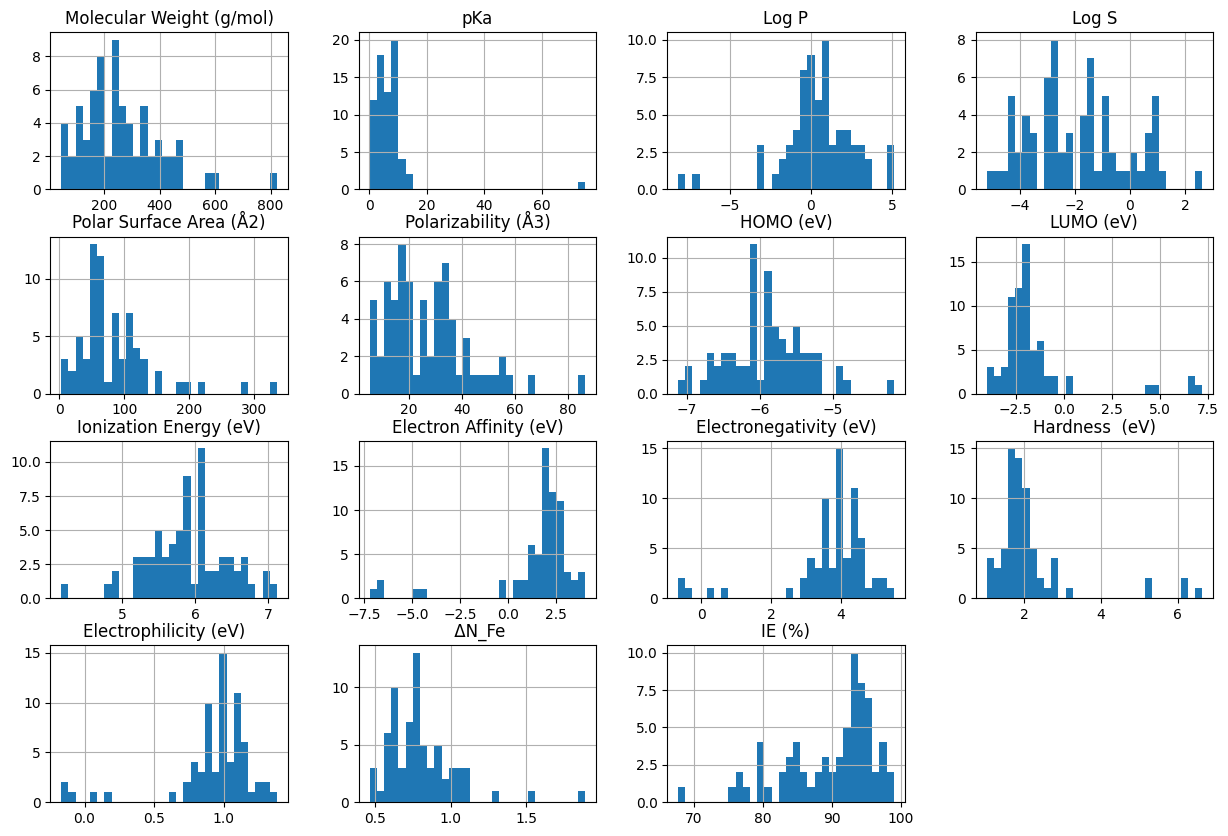

In [21]:
cleaned_df.hist(bins=30, figsize=(15, 10))
plt.show()

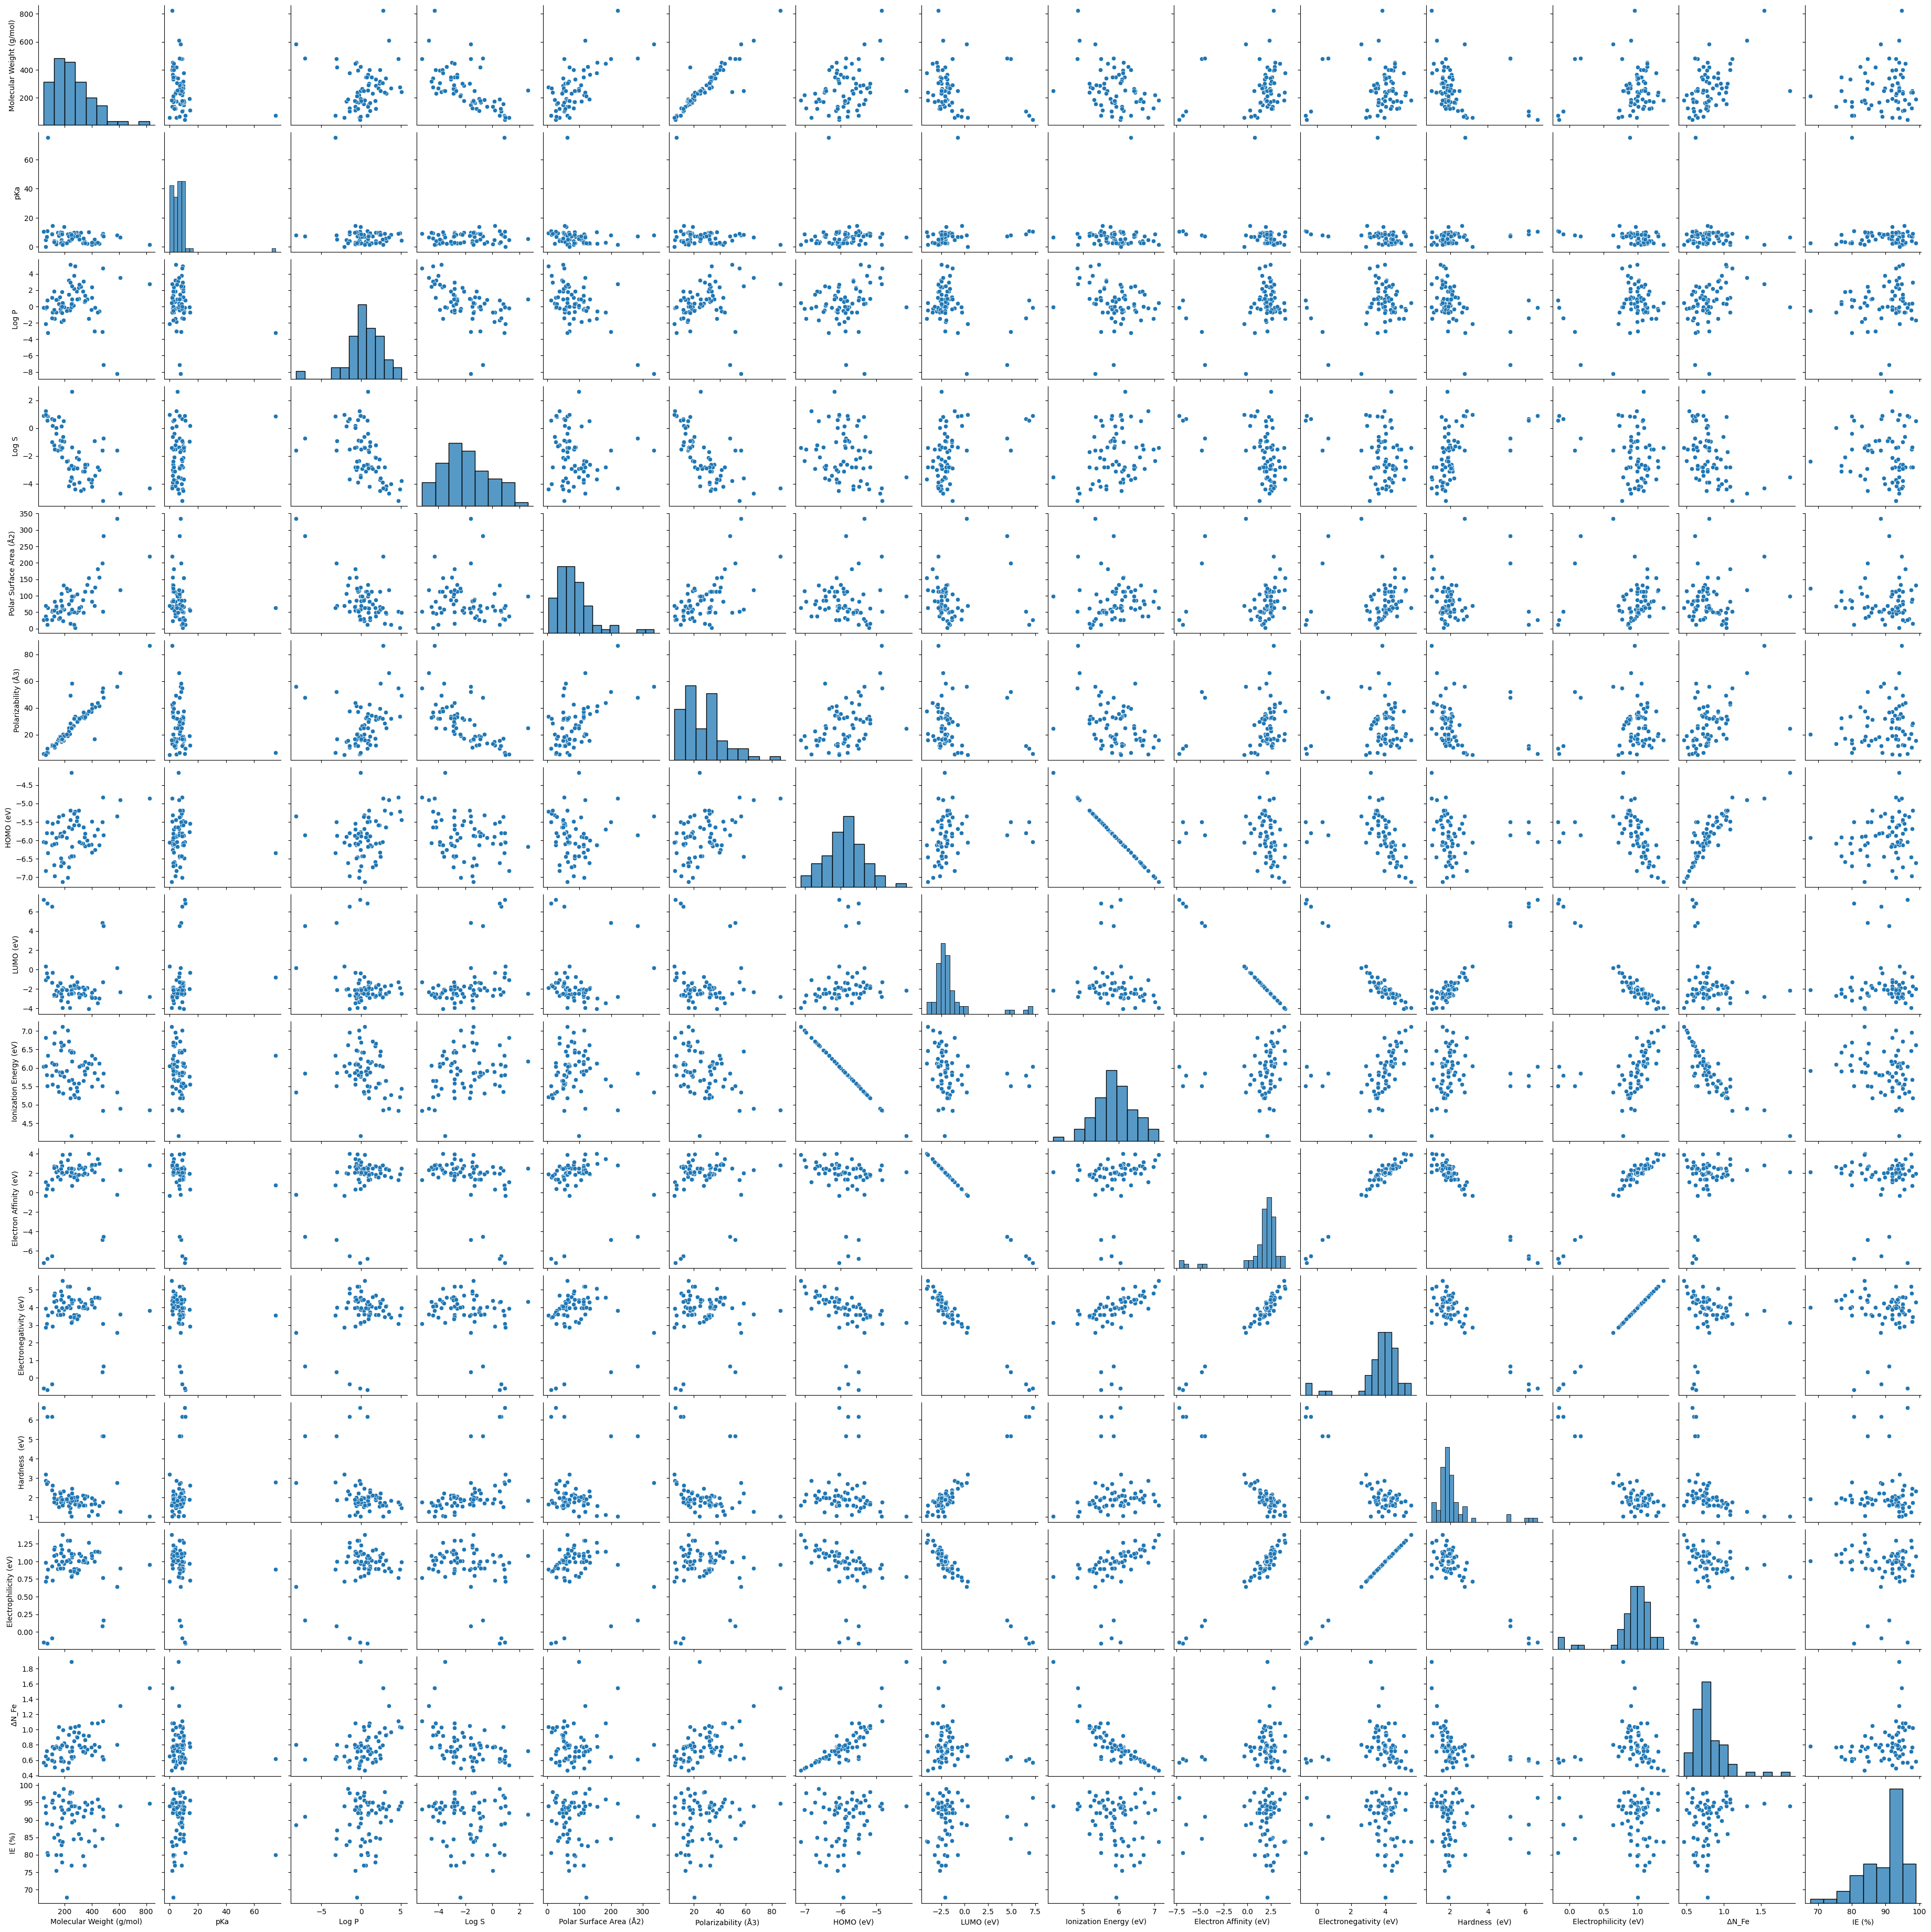

In [22]:
# Scatter plot matrix
sns.pairplot(cleaned_df)
plt.show()

In [23]:
# Mendapatkan daftar kolom
columns = cleaned_df.columns
        
# Loop melalui setiap pasangan kolom
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        
        # Membuat scatter plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=cleaned_df, x=col1, y=col2)
        plt.title(f'Scatter plot of {col1} vs {col2}')
        plt.xlabel(col1)
        plt.ylabel(col2)
        
        # Mengganti karakter yang tidak diizinkan dalam nama file
        col1_safe = col1.replace('/', '_').replace('\\', '_')
        col2_safe = col2.replace('/', '_').replace('\\', '_')
        
        # Menyimpan gambar
        plt.savefig(f'./gambar/scatter_{col1_safe}_vs_{col2_safe}.png')
        plt.close()

In [24]:
# Memilih fitur dan target
X = cleaned_df.drop(columns=['Common_name','IE (%)'])  # Asumsikan 'IE' adalah kolom target
y = cleaned_df['IE (%)']

<Axes: >

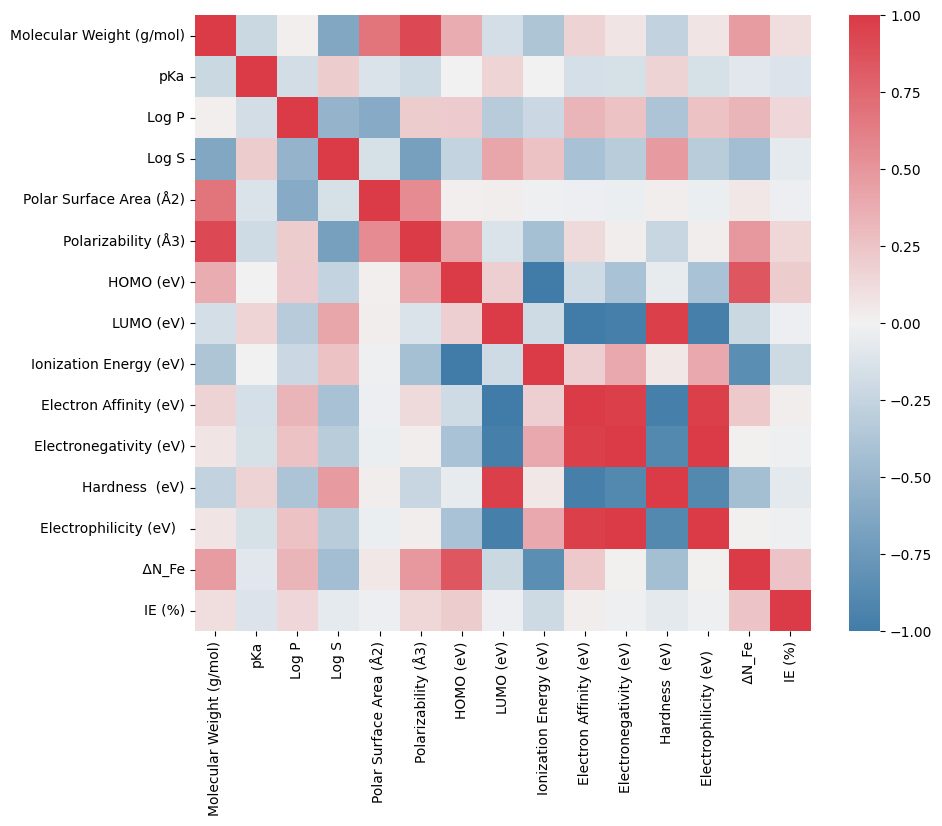

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
corr = cleaned_df.drop(columns=['Common_name']).corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.diverging_palette(240, 10, as_cmap=True),
            square=True, ax=ax)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Molecular Weight (g/mol)  70 non-null     float64
 1   pKa                       70 non-null     float64
 2   Log P                     70 non-null     float64
 3   Log S                     70 non-null     float64
 4   Polar Surface Area (Å2)   70 non-null     float64
 5   Polarizability (Å3)       70 non-null     float64
 6   HOMO (eV)                 70 non-null     float64
 7   LUMO (eV)                 70 non-null     float64
 8   Ionization Energy (eV)    70 non-null     float64
 9   Electron Affinity (eV)    70 non-null     float64
 10  Electronegativity (eV)    70 non-null     float64
 11  Hardness  (eV)            70 non-null     float64
 12  Electrophilicity (eV)     70 non-null     float64
 13   ΔN_Fe                    70 non-null     float64
dtypes: float64(1

In [27]:
X.head(10)

,Molecular Weight (g/mol),pKa,Log P,Log S,Polar Surface Area (Å2),Polarizability (Å3),HOMO (eV),LUMO (eV),Ionization Energy (eV),Electron Affinity (eV),Electronegativity (eV),Hardness (eV),Electrophilicity (eV),ΔN_Fe
0,151.16,9.90,0.91,-1.60,49.33,15.52,-5.494,-1.646,5.494,1.646,3.5700,1.9240,0.892500,0.891372
1,222.30,8.80,-0.26,-2.36,115.04,19.16,-7.010,-3.358,7.010,3.358,5.1840,1.8260,1.296000,0.497262
2,60.05,4.80,-0.17,1.22,37.30,5.34,-6.816,-1.070,6.816,1.070,3.9430,2.8730,0.985750,0.532022
3,137.14,3.38,0.83,-0.40,63.32,13.44,-5.922,-2.122,5.922,2.122,4.0220,1.9000,1.005500,0.783684
4,420.43,5.00,-3.03,-0.90,69.30,16.86,-5.869,-2.115,5.869,2.115,3.9920,1.8770,0.998000,0.801279
5,277.40,9.40,4.92,-4.39,3.24,33.74,-5.211,-1.887,5.211,1.887,3.5490,1.6620,0.887250,1.038207
6,365.40,2.40,0.87,-2.60,132.96,35.52,-5.999,-1.885,5.999,1.885,3.9420,2.0570,0.985500,0.743316
7,349.40,2.70,1.35,-2.80,112.73,34.54,-6.158,-1.973,6.158,1.973,4.0655,2.0925,1.016375,0.701195
8,188.33,2.20,0.38,-0.60,23.55,20.40,-5.313,-1.894,5.313,1.894,3.6035,1.7095,0.900875,0.993419
9,155.19,7.60,0.35,0.81,29.54,17.10,-5.358,-2.302,5.358,2.302,3.8300,1.5280,0.957500,1.037304


In [28]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 70 entries, 0 to 69
Series name: IE (%)
Non-Null Count  Dtype  
--------------  -----  
70 non-null     float64
dtypes: float64(1)
memory usage: 692.0 bytes


In [29]:
y.head(5)

0    85.8
1    93.0
2    92.0
3    80.0
4    87.0
Name: IE (%), dtype: float64

In [30]:
# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import time

# Inisialisasi model
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'ElasticNet Regression': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN Regressor': KNeighborsRegressor(n_neighbors=5)
}

# Melatih model dan menyimpan hasilnya
trained_models = {}
training_times = {}  # Untuk menyimpan waktu pelatihan setiap model
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    elapsed_time = end_time - start_time
    trained_models[name] = model
    training_times[name] = elapsed_time

In [32]:
import tensorflow as tf

In [35]:
model1 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Dense(1),
    ]
)

model1.compile(optimizer='adam', loss='mse', metrics=['mean_squared_error'])
start_time = time.time()
history = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)
end_time = time.time()
elapsed_time_model1 = end_time - start_time


Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 316ms/step - loss: 12015.9209 - mean_squared_error: 12015.9209 - val_loss: 16299.6104 - val_mean_squared_error: 16299.6104
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 11453.7969 - mean_squared_error: 11453.7969 - val_loss: 16043.5879 - val_mean_squared_error: 16043.5879
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 11544.1650 - mean_squared_error: 11544.1650 - val_loss: 15788.7295 - val_mean_squared_error: 15788.7295
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 11400.6338 - mean_squared_error: 11400.6338 - val_loss: 15536.2168 - val_mean_squared_error: 15536.2168
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 11381.9639 - mean_squared_error: 11381.9639 - val_loss: 15287.8584 - val_mean_squared_error: 15287.8584
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 11274.5244 - mean_squared_error: 11274.5244 - val_loss: 15041.2920 - val_mean_squared_error: 15041.2920
Epoch 7/1000
2/2 ━━━━

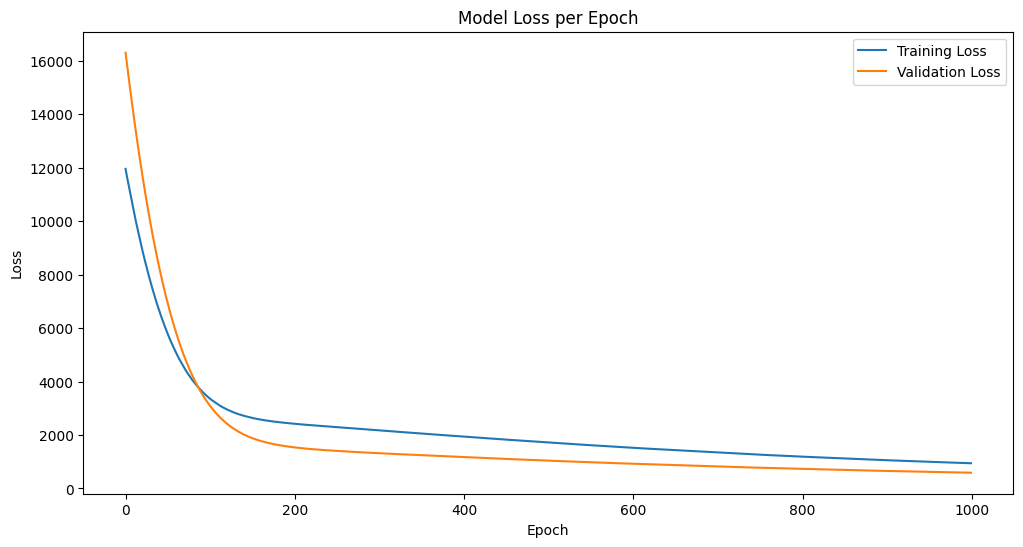

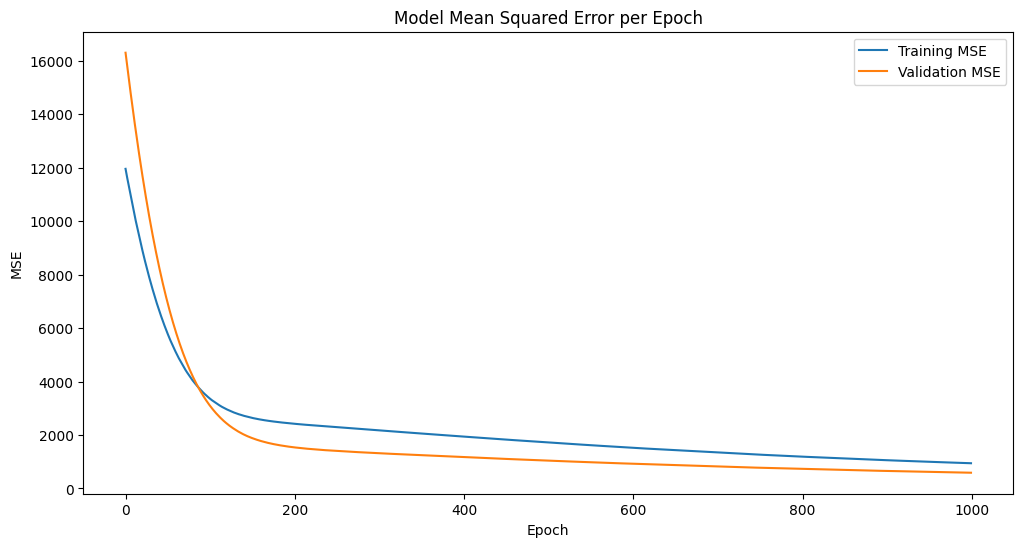

In [36]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Plot training & validation MSE values
plt.figure(figsize=(12, 6))
plt.plot(history.history['mean_squared_error'], label='Training MSE')
plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
plt.title('Model Mean Squared Error per Epoch')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [38]:
model2 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

model2.compile(optimizer='adam', loss='mse')
start_time = time.time()
history = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)
end_time = time.time()
elapsed_time_model2 = end_time - start_time

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 258ms/step - loss: 14722.7295 - val_loss: 14893.8877
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 12573.0654 - val_loss: 12500.9893
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11030.5312 - val_loss: 10364.0811
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 9388.6123 - val_loss: 8484.5283
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 7867.5713 - val_loss: 6860.0771
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 6681.4590 - val_loss: 5469.1689
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 5678.0410 - val_loss: 4299.7144
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 4797.5391 - val_loss: 3348.9065
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 3808.3501 - val_loss: 2587.7092
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 3344.4189 - val_loss: 2003.5553
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2826.4512 - val_loss: 

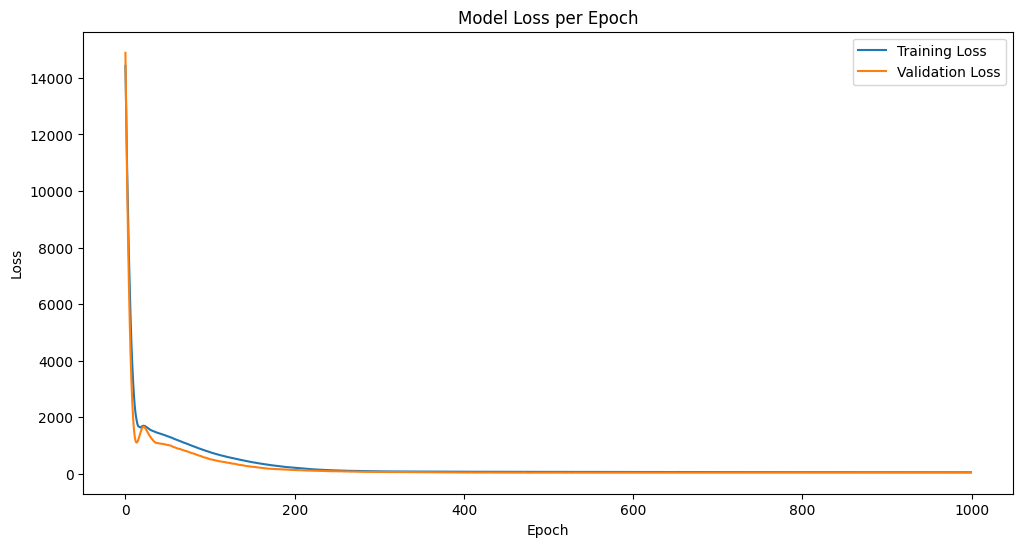

In [39]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# # Plot training & validation MSE values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['mean_squared_error'], label='Training MSE')
# plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
# plt.title('Model Mean Squared Error per Epoch')
# plt.ylabel('MSE')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [47]:
model3 = tf.keras.Sequential(
    [
        tf.keras.layers.Input(shape=(14,)),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1),
    ]
)

model3.compile(optimizer='adam', loss='mse')
start_time = time.time()
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, batch_size=32)
end_time = time.time()
elapsed_time_model3 = end_time - start_time

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 281ms/step - loss: 6447.6929 - val_loss: 1403.9999
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 2222.7520 - val_loss: 2352.3911
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 2185.6892 - val_loss: 4113.6528
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 2438.5034 - val_loss: 3074.7886
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 2350.8875 - val_loss: 1674.3383
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1991.7120 - val_loss: 1163.1647
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1805.2178 - val_loss: 1108.4178
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 1872.6807 - val_loss: 1088.3083
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 1799.4110 - val_loss: 1092.6628
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1596.3270 - val_loss: 1290.8893
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 1538.5620 - val_loss: 1647.0

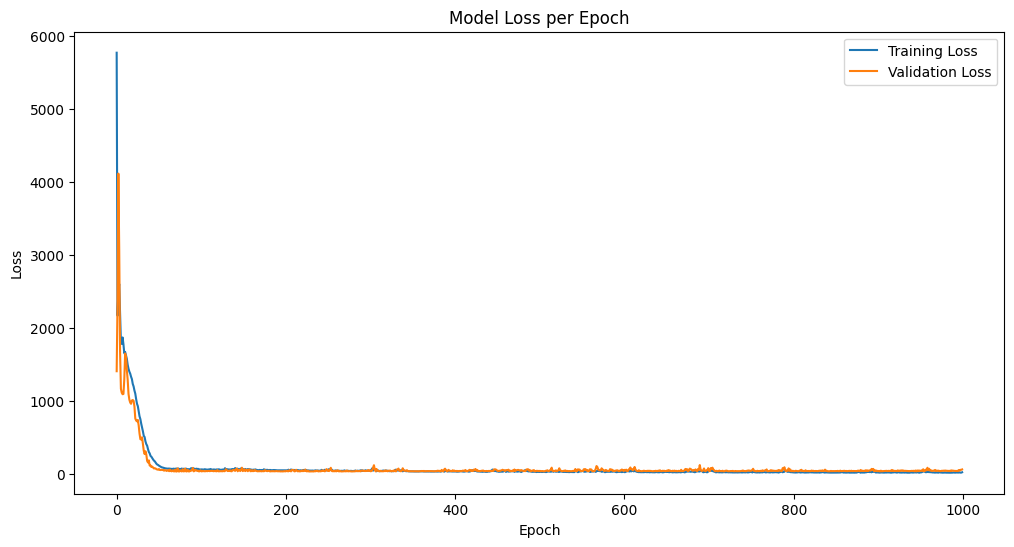

In [48]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# # Plot training & validation MSE values
# plt.figure(figsize=(12, 6))
# plt.plot(history.history['mean_squared_error'], label='Training MSE')
# plt.plot(history.history['val_mean_squared_error'], label='Validation MSE')
# plt.title('Model Mean Squared Error per Epoch')
# plt.ylabel('MSE')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [49]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

In [50]:
trained_models['single persectron'] = model1
training_times['single persectron'] = elapsed_time_model1

trained_models['single layer perceptron'] = model2
training_times['single layer perceptron'] = elapsed_time_model2

trained_models['multi layer perceptron'] = model3
training_times['multi layer perceptron'] = elapsed_time_model3

In [51]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Fungsi untuk mengevaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    return mse, mae, rmse, r2

# Evaluasi model
evaluation_results = {}
for name, model in trained_models.items():
    mse, mae, rmse, r2 = evaluate_model(model, X_test, y_test)
    evaluation_results[name] = {
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R² Score': r2,
        'Training Time': training_times[name]  # Gunakan waktu pelatihan yang sesuai dengan model
    }

# Menampilkan hasil evaluasi
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    for metric_name, value in metrics.items():
        if metric_name == 'Training Time':
            print(f"  {metric_name}: {value*1000:.2f} ms")  # Konversi ke milidetik
        else:
            print(f"  {metric_name}: {value:.4f}")
    print()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Linear Regression:
  MSE: 23.8460
  MAE: 4.3251
  RMSE: 4.8832
  R² Score: 0.1262
  Training Time: 18.54 ms

Ridge Regression:
  MSE: 23.7368
  MAE: 4.4199
  RMSE: 4.8720
  R² Score: 0.1302
  Training Time: 10.11 ms

Lasso Regression:
  MSE: 22.1330
  MAE: 4.3721
  RMSE: 4.7046
  R² Score: 0.1890
  Training Time: 4.22 ms

ElasticNet Regression:
  MSE: 22.2560
  MAE: 4.3662
  RMSE: 4.7176
  R² Score: 0.1845
  Training Time: 0.00 ms

Decision Tree Regressor:
  MSE: 25.0818
  MAE: 4.3643
  RMSE: 5.0082
  R² Score: 0.0810
  Training Time: 7.78 ms

Random Forest Regressor:
  MSE: 23.2804
  MAE: 3.9891
  RMSE: 4.8250
  R² Score: 0.1470
  Training Time: 200.15 ms

Gradient Boosting Regressor:
  MSE: 21.5214
  MAE: 3.8178
  RMSE: 4.6391
  R² Score: 0.2114
  Training Time: 199.98 ms

SVR:
  MSE: 28.4957
  MAE: 4.7673
  RMSE: 5.3381
  R² Score: -0.0441
  Training Time: 9.19 ms

KNN 

In [52]:
# Membuat DataFrame untuk perbandingan
results_df = pd.DataFrame(evaluation_results).T
results_df

,MSE,MAE,RMSE,R² Score,Training Time
Linear Regression,23.845986,4.325123,4.883235,0.126233,0.018543
Ridge Regression,23.736753,4.419872,4.872038,0.130236,0.010109
Lasso Regression,22.133025,4.372087,4.704575,0.189000,0.004220
ElasticNet Regression,22.255998,4.366179,4.717626,0.184494,0.000000
Decision Tree Regressor,25.081786,4.364286,5.008172,0.080951,0.007783
Random Forest Regressor,23.280377,3.989149,4.824974,0.146958,0.200154
Gradient Boosting Regressor,21.521361,3.817764,4.639112,0.211412,0.199979
SVR,28.495657,4.767275,5.338132,-0.044140,0.009195
KNN Regressor,30.270117,4.991714,5.501829,-0.109160,0.000218
single persectron,589.706970,22.099633,24.283883,-20.608095,140.874837
